# 2018/2019 - Task List 2

1. Visualize (pmf, mean, variance) of pseudo random number generators (parametrized) that follows distributions:

    - Single gaussian 
    - Two combined gaussian distributions 
    - N combined gaussian distributions 


2. Student applied for 9 faculties, acceptance chance for each faculty was 0.01. Unfortunately student was not accepted to any. What is the probability of that situation? Write a function that will solve that problem (parametrized), use exact method and binomials based solution with parameterized number of trials (binomial)

## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from scipy import special

# Binomial sampling

In [29]:
m = pyro.distributions.Binomial(1, torch.Tensor(9*[0.01]))
m.sample()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
m = pyro.distributions.Binomial(1, torch.Tensor(5*[0.5]))
m.sample()

tensor([1., 1., 1., 0., 1.])

In [42]:
m = pyro.distributions.Binomial(1, torch.Tensor(5*[0.5]))
m.log_prob(torch.Tensor([1]))

tensor([-0.6931, -0.6931, -0.6931, -0.6931, -0.6931])

## Task 1

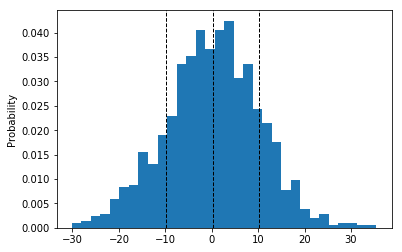

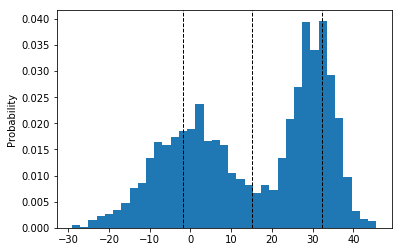

[-68, -32, 0, 33, 61] [5, 10, 8, 13, 3]


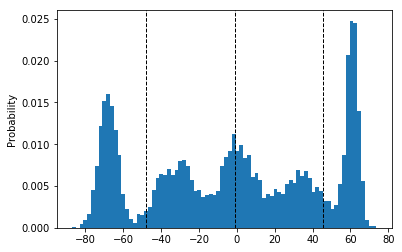

In [9]:
def plot(x):
    mean = np.mean(x)
    variance = np.sqrt(np.var(x)) #std deviation
    bins = int((np.max(x)-np.min(x))/2)
   
    result = plt.hist(x, density=True, bins=bins)
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean + variance, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean - variance, color='k', linestyle='dashed', linewidth=1)
    plt.ylabel('Probability')
    plt.show()

def plot_one(mean, variance):
    samples = []
    
    dist = pyro.distributions.Normal(mean, variance)
    for i in range(1000):
        samples.append(dist.sample())

    plot(samples)
    
def plot_two(means, variances):
    if len(means) < 2 or len(variances) < 2:
        return
    samples = []
    
    for i in range(2):
        mean = means[i]
        variance = variances[i]
        dist = pyro.distributions.Normal(mean, variance)
        for i in range(1000):
            samples.append(dist.sample().item())
    
    plot(samples)

def plot_n(N,means,variances):
    if len(means) < N or len(variances) < N:
        return
    print(means,variances)
    samples = []
    
    for i in range(N):
        mean = means[i]
        variance = variances[i]
        dist = pyro.distributions.Normal(mean, variance)
        for i in range(1000):
            samples.append(dist.sample())
            
    plot(samples)

N = 5
plot_one(0,10)
plot_two([0,30],[10,5])
plot_n(5,[-68,-32,0,33,61],[5,10,8,13,3])
#plot_n(N,np.random.randint(low=-100,high=100,size=N),np.random.randint(low=1,high=20,size=N))

## Task 2

In [7]:
## Insert solution here
def exact_solution(number_all, number_accepted, probability_acceptance):
    n = number_all
    k = number_accepted
    p = probability_acceptance
    return special.binom(n, k)*(p**k)*((1-p)**(n-k))

def probabilistic_solution(number_all, number_accepted, probability_acceptance):
    m = pyro.distributions.Binomial(number_all, torch.Tensor([probability_acceptance]))
    num_of_trials = 10000
    sum_ok = 0
    for i in range(num_of_trials):
        sample = m.sample()
        if sum(sample) == number_accepted:
            sum_ok += 1
    return sum_ok/num_of_trials


num_of_faculties = 9
num_accepted = 0
prob_acceptance = 0.01
print("Exact: {}".format(exact_solution(num_of_faculties,num_accepted,prob_acceptance)))
print("Probabilistic: {}".format(probabilistic_solution(num_of_faculties,num_accepted,prob_acceptance)))

Exact: 0.9135172474836408
Probabilistic: 0.9123
